In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv('/content/Housing_Area - Sheet1.csv')

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


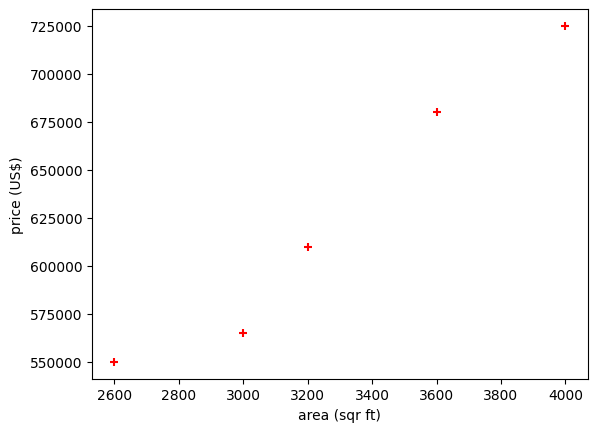

In [4]:
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price) # First argument has to be like a 2D array.

LinearRegression()

In [6]:
# prompt: predict the value of 3300 using reg model

reg.predict([[3300]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [7]:
reg.coef_

array([135.78767123])

In [8]:
reg.intercept_

180616.43835616432

In [9]:
# We can use our Reg model to predict the prices of unknown prices which is in our unknown prices.csv files.

In [12]:
df1 = pd.read_csv('/content/Unknown_Prices - Sheet1.csv')

In [13]:
df1

,area
0,2600
1,3000
2,3200
3,3600
4,3600
5,4500
6,5600
7,2577
8,8781


In [14]:
reg.predict(df1)

array([ 533664.38356164,  587979.45205479,  615136.98630137,
        669452.05479452,  669452.05479452,  791660.95890411,
        941027.39726027,  530541.26712329, 1372967.97945205])

In [15]:
# We can store these predicted variables into some of our variable and then we can use it to
# assign into some of different variable into our sheet.

In [16]:
p = reg.predict(df1)

In [17]:
# Create a prices column in our df1 file and then store these values within it.
df1['prices'] = p

In [18]:
df1.to_csv("prediction.csv")

In [19]:
import pickle # It allows us to serialize our python object into a file.

In [20]:
with open('model_pickle', 'wb') as f:
  pickle.dump(reg, f)

In [21]:
with open('model_pickle', 'rb') as f:
  mp = pickle.load(f)

In [22]:
mp.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [23]:
# There are two ways to storing model.
# 1. pickle file.
# 2. Joblib file.
# If our model contains lot of numpy array then using joblib can be more efficient.